In [1]:
%pylab inline
from scipy.optimize import curve_fit
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import matplotlib.style as style
import itertools
from sklearn.linear_model import LogisticRegression
import sys

import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


## Udacity Bookie

In [2]:
df_both_seasons = pd.read_pickle('df_both_seasons')

In [3]:
goals_list_h=(df_both_seasons.loc[df_both_seasons['HomeTeam']=='Leverkusen']['FTHG'].dropna().tolist() +
       df_both_seasons.loc[df_both_seasons['AwayTeam']=='Leverkusen']['FTAG'].dropna().tolist())
lam_h = np.mean(goals_list_h)

In [4]:
goals_list_a=(df_both_seasons.loc[df_both_seasons['HomeTeam']=='Hertha']['FTHG'].dropna().tolist() +
       df_both_seasons.loc[df_both_seasons['AwayTeam']=='Hertha']['FTAG'].dropna().tolist())
lam_a = np.mean(goals_list_a)

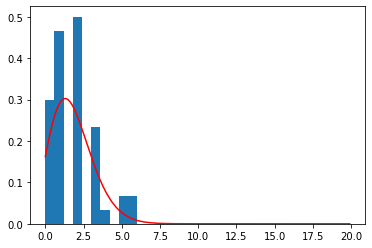

In [5]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

t = np.arange(0, 20, 0.1)
d = np.exp(-lam_h)*np.power(lam_h, t)/factorial(t)
plt.hist(goals_list_h, normed=True)
plt.plot(t, d, 'red')
plt.show()

In [6]:
goals_home=np.random.poisson(lam_h, 1000)

In [7]:
goals_away=np.random.poisson(lam_a, 1000)

In [8]:
np.where((goals_home - goals_away) == 0)[0].shape[0]

217

In [9]:
np.where((goals_home - goals_away) > 0)[0].shape[0]

450

In [10]:
np.where((goals_home - goals_away) < 0)[0].shape[0]

333

In [11]:
lam = (df_both_seasons['FTHG'][9:] + df_both_seasons['FTAG'][9:]).mean()

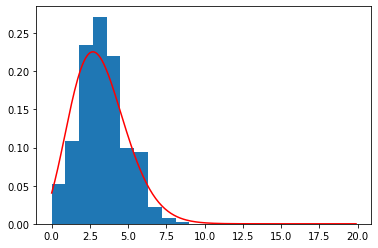

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

t = np.arange(0, 20, 0.1)
d = np.exp(-lam)*np.power(lam, t)/factorial(t)
plt.hist((df_both_seasons['FTHG'][9:] + df_both_seasons['FTAG'][9:]), normed=True)
plt.plot(t, d, 'red')
plt.show()

## Poisson Bookie

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

epl_1617 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1920/D1.csv")
epl_1617 = epl_1617[['HomeTeam','AwayTeam','FTHG','FTAG']]
epl_1617 = epl_1617.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
epl_1617.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals
0,Bayern Munich,Hertha,2,2
1,Dortmund,Augsburg,5,1
2,Freiburg,Mainz,3,0
3,Leverkusen,Paderborn,3,2
4,Werder Bremen,Fortuna Dusseldorf,1,3


In [14]:
epl_1617 = epl_1617[:-10]
epl_1617.mean()

HomeGoals    1.791045
AwayGoals    1.485075
dtype: float64

In [15]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk')

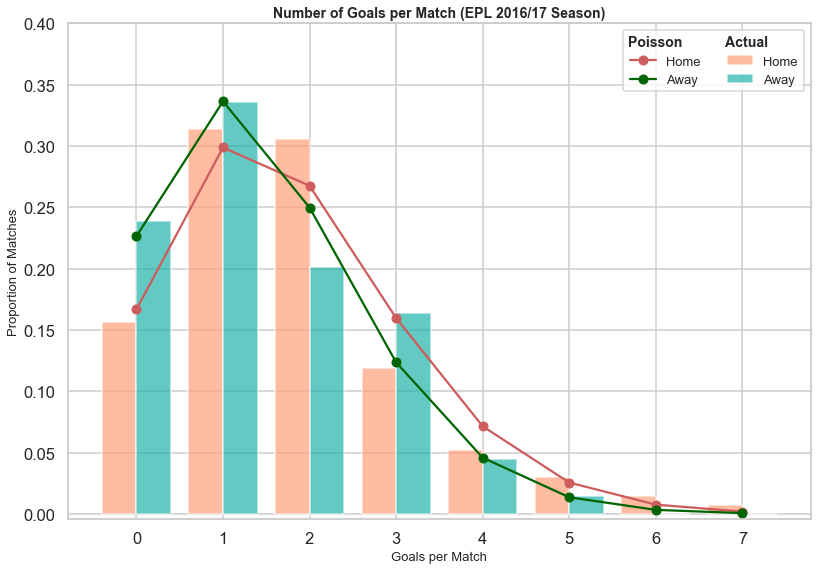

In [16]:
# construct Poisson  for each mean goals value
poisson_pred = np.column_stack([[poisson.pmf(i, epl_1617.mean()[j]) for i in range(8)] for j in range(2)])

# plot histogram of actual goals
plt.hist(epl_1617[['HomeGoals', 'AwayGoals']].values, range(9), 
         alpha=0.7, label=['Home', 'Away'],normed=True, color=["#FFA07A", "#20B2AA"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Match (EPL 2016/17 Season)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

In [17]:
poisson_pred

array([[0.16678582, 0.22648544],
       [0.29872088, 0.33634778],
       [0.26751124, 0.24975078],
       [0.1597082 , 0.12363285],
       [0.07151113, 0.045901  ],
       [0.02561593, 0.01363328],
       [0.00764655, 0.00337441],
       [0.00195647, 0.00071589]])

In [18]:
skellam.pmf(0.0,  epl_1617.mean()[0],  epl_1617.mean()[1])

0.22846390790566629

In [19]:
skellam.pmf(1,  epl_1617.mean()[0],  epl_1617.mean()[1])

0.20764808285093725

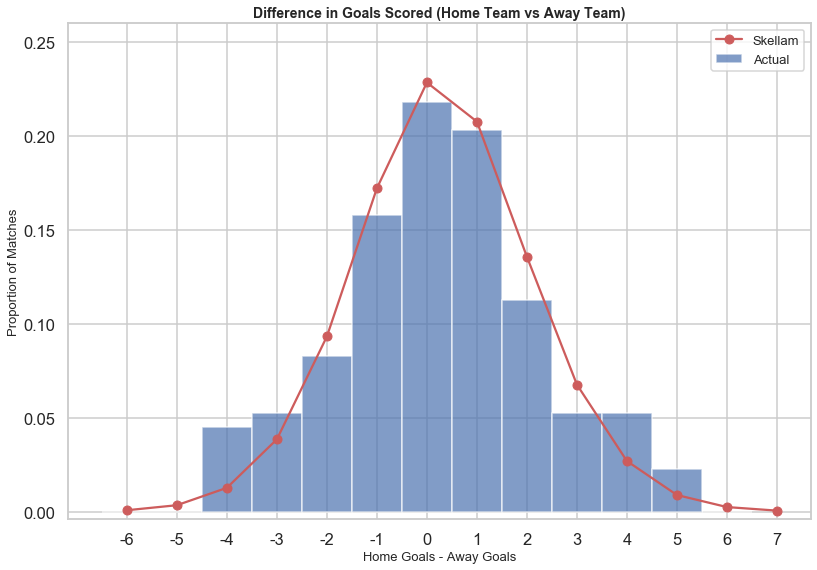

In [20]:
skellam_pred = [skellam.pmf(i,  epl_1617.mean()[0],  epl_1617.mean()[1]) for i in range(-6,8)]

plt.hist(epl_1617[['HomeGoals']].values - epl_1617[['AwayGoals']].values, range(-6,8), 
         alpha=0.7, label='Actual',normed=True)
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o',label="Skellam", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Goals - Away Goals",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Difference in Goals Scored (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([epl_1617[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           epl_1617[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  268
Model:                            GLM   Df Residuals:                      232
Model Family:                 Poisson   Df Model:                           35
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.78
Date:                Fri, 20 Dec 2019   Deviance:                       245.56
Time:                        14:02:34   Pearson chi2:                     208.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.5525      0.289      1.914      0.056      -0.013       1.118
team[T.Bayern Munich]              0.4618      0.259      1.783      0.075      -0.046       0.969
team[T.Dortmund]                   0.3979      0.264      1.508      0.131      -0.119       0.915
team[T.Ein Frankfurt]              0.0582      0.292      0.200      0.842      -0.513       0.630
team[T.FC Koln]                   -0.5205      0.338     -1.539      0.124      -1.183       0.142
team[T.Fortuna Dusseldorf]        -0.3958      0.323     -1.224      0.221      -1.030       0.238
team[T.Freiburg]                  -0.0452      0.291     -0.156      0.876      -0.615       0.524
team[T.Hertha]                    -0.1557      0.301     -0.517      0.605      -0.745       0.434
team[T.Hoffenheim]                -0.1817      0.301     -0.604      0.546      -0.772       0.408
team[T.Leverkusen]                -0.0725      0.298     -0.244      0.808      -0.656       0.511
team[T.M'gladbach]                 0.2551      0.274      0.929      0.353      -0.283       0.793
team[T.Mainz]                     -0.1401      0.305     -0.459      0.646      -0.738       0.458
team[T.Paderborn]                 -0.3041      0.314     -0.969      0.333      -0.919       0.311
team[T.RB Leipzig]                 0.5317      0.257      2.072      0.038       0.029       1.035
team[T.Schalke 04]                 0.0293      0.288      0.102      0.919      -0.535       0.594
team[T.Union Berlin]              -0.2419      0.308     -0.785      0.433      -0.846       0.362
team[T.Werder Bremen]              0.0134      0.295      0.046      0.964      -0.564       0.591
team[T.Wolfsburg]                 -0.4158      0.319     -1.305      0.192      -1.041       0.209
opponent[T.Bayern Munich]         -0.2974      0.291     -1.022      0.307      -0.868       0.273
opponent[T.Dortmund]              -0.3486      0.299     -1.167      0.243      -0.934       0.237
opponent[T.Ein Frankfurt]         -0.2268      0.287     -0.789      0.430      -0.790       0.337
opponent[T.FC Koln]                0.0184      0.265      0.069      0.945      -0.501       0.538
opponent[T.Fortuna Dusseldorf]     0.0701      0.260      0.270      0.787      -0.439       0.579
opponent[T.Freiburg]              -0.4241      0.304     -1.394      0.163      -1.020       0.172
opponent[T.Hertha]                 0.0126      0.267      0.047      0.963      -0.511       0.536
opponent[T.Hoffenheim]            -0.0507      0.272     -0.186      0.852      -0.584       0.483
opponent[T.Leverkusen]            -0.3744      0.295     -1.271      0.204      -0.952       0.203
opponent[T.M'gladbach]            -0.4557      0.304     -1.498      0.134      -1.052       0.141
opponent[T.Mai

In [23]:
poisson_model.predict(pd.DataFrame(data={'team': 'Hertha', 'opponent': "M'gladbach",
                                       'home':1},index=[1]))

1    1.119938
dtype: float64

In [24]:
poisson_model.predict(pd.DataFrame(data={'team': "M'gladbach", 'opponent': 'Hertha',
                                       'home':0},index=[1]))

1    2.270814
dtype: float64

In [25]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
simulate_match(poisson_model, 'Hertha', "M'gladbach", max_goals=3)

array([[0.03368334, 0.0764886 , 0.0868457 , 0.06573681],
       [0.03772325, 0.08566248, 0.09726178, 0.07362114],
       [0.02112385, 0.04796833, 0.05446358, 0.04122555],
       [0.0078858 , 0.01790718, 0.02033194, 0.01539002]])

In [26]:
hertha_gladbach = simulate_match(poisson_model, "Hertha", "M'gladbach", max_goals=10)
# chelsea win
np.sum(np.tril(hertha_gladbach, -1))

0.17560265368899883

In [27]:
np.sum(np.diag(hertha_gladbach))

0.1919130105377371

In [28]:
np.sum(np.triu(hertha_gladbach, 1))

0.6324579988371153

In [29]:
epl_1617_halves = pd.read_csv("https://www.football-data.co.uk/mmz4281/1920/D1.csv")
epl_1617_halves = epl_1617_halves[['FTHG', 'FTAG', 'HTHG', 'HTAG']]
epl_1617_halves['FHgoals'] = epl_1617_halves['HTHG'] + epl_1617_halves['HTAG']
epl_1617_halves['SHgoals'] = epl_1617_halves['FTHG'] + epl_1617_halves['FTAG'] - epl_1617_halves['FHgoals']
epl_1617_halves = epl_1617_halves[['FHgoals', 'SHgoals']]
epl_1617_halves.mean()

FHgoals    1.451389
SHgoals    1.819444
dtype: float64

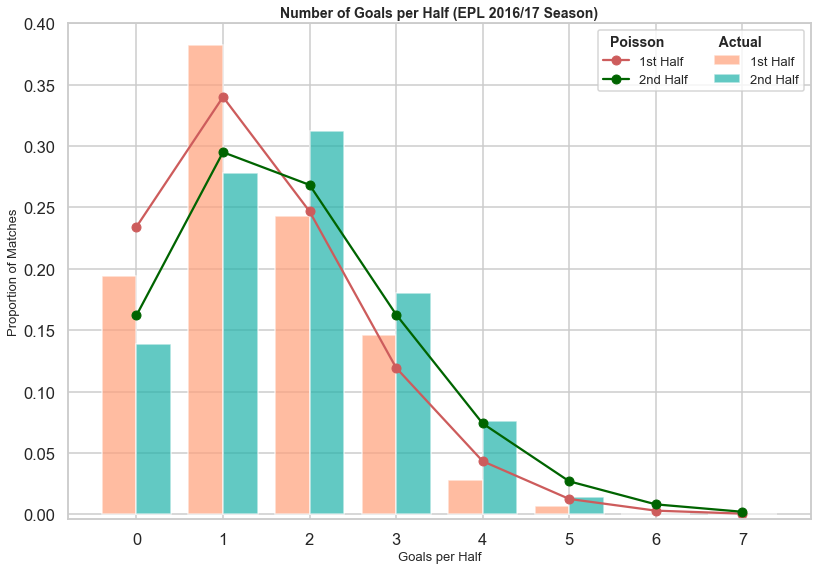

In [30]:
poisson_halves_pred = np.column_stack([[poisson.pmf(i, epl_1617_halves.mean()[j]) for i in range(8)] for j in range(2)])

plt.hist(epl_1617_halves.values, range(9), 
         alpha=0.7, label=['1st Half', '2nd Half'],normed=True, color=["#FFA07A", "#20B2AA"])

pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_halves_pred[:,0],
                  linestyle='-', marker='o',label="1st Half", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_halves_pred[:,1],
                  linestyle='-', marker='o',label="2nd Half", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson              Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Goals per Half",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Half (EPL 2016/17 Season)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()